## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Definition of the simulation
<hr>
<p style="font-size:1.2em">Here we use np.random.binomial() function to imitate a single PC cell inhibitory connections from the PV and SST cells available on distance less than 150 micrometers.</p>
<hr>

In [2]:
def one_time_simulation(probability_pv=0.375, number_of_cells_pv=111, #0.411
                        probability_sst=0.275, number_of_cells_sst=95): #0.424

    strength_ratio_pv_sst = 1.55

    activity = (30/37) / (11/17)
    
    result = strength_ratio_pv_sst * activity * sum(np.random.binomial(1, probability_pv, number_of_cells_pv))/sum(np.random.binomial(1, probability_sst, number_of_cells_sst))
    
    return result

In [3]:
data = []

<hr>
<p style="font-size:1.2em">We repeat single PC cell inhibitory connectivity simulation 100000 times to obtain a distribution of the PC cell population based on random inhibitory connectivity.</p>
<hr>

In [4]:
for i in range(100000):
    data.append(one_time_simulation())

In [5]:
data

[3.3548134911771275,
 4.2376591467500555,
 3.5110092610092614,
 2.4563882063882065,
 3.8845208845208843,
 3.8845208845208847,
 2.635924885924886,
 3.1076167076167076,
 3.0521235521235526,
 2.756756756756757,
 2.877422877422877,
 2.5896805896805897,
 4.053413096891358,
 3.4183783783783785,
 3.8845208845208847,
 2.568796068796069,
 4.624429624429625,
 2.8711676102980452,
 3.3406879606879607,
 3.8845208845208847,
 4.29341781973361,
 3.560810810810811,
 3.0808269084131155,
 3.729140049140049,
 3.800074778335648,
 2.661616161616162,
 3.722665847665848,
 1.9422604422604424,
 2.4780564263322886,
 2.9522358722358724,
 3.3778442474094645,
 3.2121999621999624,
 2.7335517335517334,
 3.237100737100737,
 2.5896805896805897,
 2.3064342751842752,
 2.6789799203592306,
 2.1364864864864868,
 2.9133906633906634,
 3.7920322920322924,
 4.414228277864641,
 3.1326781326781328,
 3.2089520350389917,
 4.2729729729729735,
 4.424037674037674,
 2.6789799203592306,
 2.118829573375028,
 3.02992628992629,
 2.83246314

<hr>
<p style="font-size:1.2em">A follow cell saves data in a .csv format.</p>
<hr>

In [6]:
data_exp = pd.DataFrame(data)
data_exp.to_csv("Simulation_histogram.csv")

<hr>
<p style="font-size:1.2em">Defenition of the tertile boudaries</p>
<hr>

In [7]:
q1 = np.percentile(data, 33)
q2 = np.percentile(data, 66)
mean = np.percentile(data, 50)
print(q1, q2)

2.8324631449631448 3.3778442474094645


<hr>
<p style="font-size:1.2em">Calculating averages of 1st and 3rd tertiles</p>
<hr>

In [8]:
count = 0
sum = 0
for i in [n for n in data if n <= q1]:
    sum += i
    count += 1

q1_avg = sum / count

In [9]:
count = 0
sum = 0
for i in [n for n in data if n >= q2]:
    sum += i
    count += 1

q2_avg = sum / count

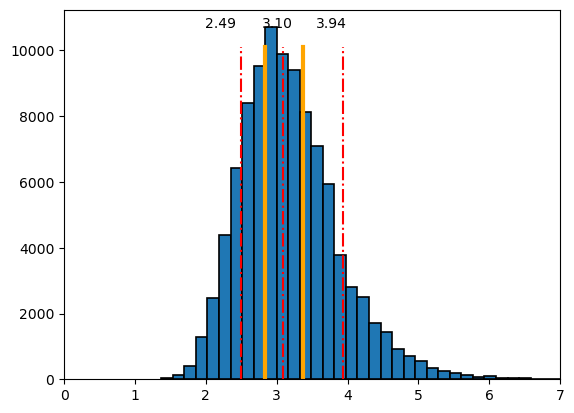

2.8324631449631448 3.3778442474094645


In [10]:
x, y, _ = plt.hist(data, bins=50, edgecolor="black", linewidth=1.2)
plt.xlim(0, 7)
plt.axvline(x=q1, ymax=.9, color="orange", linestyle="-", linewidth = 3)
plt.axvline(x=q1_avg, ymax=.9, color="red", linestyle="-.")
plt.axvline(x=mean, ymax=.9, color="red", linestyle="-.")
plt.axvline(x=q2, ymax=.9, color="orange", linestyle="-", linewidth = 3)
plt.axvline(x=q2_avg, ymax=.9, color="red", linestyle="-.")
plt.text(q1_avg-0.2*q1_avg, x.max(), f"{q1_avg:.2f}")
plt.text(q2_avg-0.1*q2_avg, x.max(), f"{q2_avg:.2f}")
plt.text(mean-0.1*mean, x.max(), f"{mean:.2f}")

plt.show()
print(q1, q2)

In [11]:
y

array([1.37100737, 1.53392875, 1.69685012, 1.8597715 , 2.02269287,
       2.18561425, 2.34853563, 2.511457  , 2.67437838, 2.83729975,
       3.00022113, 3.16314251, 3.32606388, 3.48898526, 3.65190663,
       3.81482801, 3.97774939, 4.14067076, 4.30359214, 4.46651351,
       4.62943489, 4.79235627, 4.95527764, 5.11819902, 5.28112039,
       5.44404177, 5.60696314, 5.76988452, 5.9328059 , 6.09572727,
       6.25864865, 6.42157002, 6.5844914 , 6.74741278, 6.91033415,
       7.07325553, 7.2361769 , 7.39909828, 7.56201966, 7.72494103,
       7.88786241, 8.05078378, 8.21370516, 8.37662654, 8.53954791,
       8.70246929, 8.86539066, 9.02831204, 9.19123342, 9.35415479,
       9.51707617])